
## EXERCICE 8 : Utilisation de Pandas et sklearn pour l'analyse de données réelles



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


### Question 1 : 
- utiliser la fonction pandas.read_csv avec les bonnes options pour charger le fichier RealMedicalData.csv. On remarquera que le separateur dans le fichier csv est ';' et que les decimales sont representees par des virgules et non des points. Il est important de remarquer qu'un dataframe et non un numpy array sera retourne. Cette classe contient l'equivalent d'un numpy.array mais aussi le nom des lignes et colonnes, tout comme dans les dataframes de R
- Extraire deux numpy.arrays X et y des donnes pour faire par la suite de la regression. Nous allons essayer d'expliquer  'Disease progression' avec les autres variables. Ce sera alors la colonne qui contient y. Les autres colonnes contiendront les donnees de X.
- Une fois X et y extrait, centrer et reduire X. La fonction sklearn.preprocessing.scale pourra etre utilisee


In [19]:
df = pd.read_csv("RealMedicalData.csv", sep=';', decimal=',')
df = df.dropna()
df.head()

y = df['Disease progression'].values
y = np.array(y)

X = df.drop(columns=['Disease progression']).values
X = np.array(X)

Z = preprocessing.scale(X)



### Question 2 : 
- Mettre en lien X et y a l'aide de la regression lineaire multiple avec une penalisation Lasso
- A la vue des resultats, quelle variable vous semble liee a 'Disease progression'?
- Verifier cette relation en representant des nuages de points mettant en lien les observations de chaque variable avec les observations de 'Disease progression'



Lasso coefficients: [ 1.48132903  0.          0.          0.02892491  0.         -0.13537681
  0.35754377 -0.09919989  0.          0.          0.25289831  0.
  0.45714872  0.          0.23869222 -0.13189336 -0.70001228  0.        ]
mse: 9.093301848102357


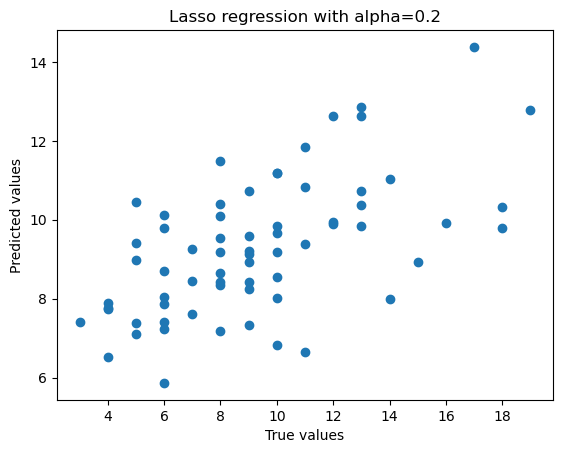

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
alpha = 0.2
lr = Lasso(alpha=alpha)
lr.fit(Z,y)
print("Lasso coefficients:", lr.coef_)

y_pred = lr.predict(Z)
mse = mse(y, y_pred)
print("mse:", mse)

plt.plot(y, y_pred, 'o')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Lasso regression with alpha="+str(alpha))
plt.show()
